<h2>AIM</h2> 
To create a recommendation system by first beginning with data exploration and then using 4 different models to create a *product recommender system*.

It also answers some key questions to be considered when comparing different models of recommendation systems!

<blockquote>Model 1: Random</blockquote>
<blockquote>Model 2: User-Based Collaborative Filtering</blockquote>
<blockquote>Model 3: Item-Based Collaborative Filtering</blockquote>
<blockquote>Model 4: Matrix Factorization</blockquote>

<h2>The Surprise Package</h2>

The Surprise package (Simple Python Recommendation System Engine) is an open-source Python library specifically designed for building and evaluating recommendation systems. It provides a range of algorithms for collaborative filtering, matrix factorization, and other recommendation techniques. The Surprise package simplifies the process of creating, training, and evaluating recommendation models by offering a standardized interface and evaluation metrics.

In [2]:
!pip install scikit-surprise
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise import  SVD, NormalPredictor, KNNBasic
from surprise.model_selection import cross_validate
from surprise import accuracy
from IPython.display import display
from collections import defaultdict
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split

  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-win_amd64.whl size=1139642 sha256=dcbcc9f1d1f29c387549f1b46f8fa81654146878f9c0cf53c9ba669bcedbb6e7
  Stored in directory: c:\users\udit\appdata\local\pip\cache\wheels\af\db\86\2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


<h1>Data Preprocessing</h1>

In [3]:
df = pd.read_csv('amazon.csv')

In [4]:
df.shape

(1465, 16)

In [5]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [18]:
def keep_required_columns(df):
    required_columns = ['user_id', 'product_id', 'rating']
    columns_to_drop = [col for col in df.columns if col not in required_columns]
    df = df.drop(columns=columns_to_drop)
    return df

data = keep_required_columns(df)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  1465 non-null   object
 1   rating      1465 non-null   object
 2   user_id     1465 non-null   object
dtypes: object(3)
memory usage: 34.5+ KB


In [22]:
data.head()

,product_id,rating,user_id
0,B07JW9H4J1,4.2,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,4.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,3.9,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,4.2,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,B08CF3B7N1,4.2,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."


<h1>Encoding User and Product IDs</h1>

In a recommendation system, it is often necessary to represent user and product identifiers (IDs) as numerical values that can be processed by machine learning algorithms. The provided code snippet achieves this by utilizing the `LabelEncoder` from the `sklearn.preprocessing` module.

- The `LabelEncoder` is a handy tool for converting categorical values (such as user and product IDs in string format) into a numerical format. It assigns a unique integer to each distinct value, creating a mapping between original values and encoded integers.

- By using the `fit_transform` method, the `LabelEncoder` learns the mapping and transforms the original string IDs into corresponding integer values. These encoded values are then stored in new columns named `user_encoded` and `item_encoded` within the DataFrame `data`.

- The code also creates dictionaries `user_mapping` and `item_mapping` to store the correspondence between original IDs and their encoded integer values. This mapping can be useful for interpreting the encoded values back to their original string form if needed.

In summary, this code plays a crucial role in converting categorical user and product IDs into numerical format, enabling the dataset to be processed effectively by recommendation algorithms that require numerical input.


In [ ]:
from sklearn.preprocessing import LabelEncoder
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()
data['user_encoded'] = user_encoder.fit_transform(data['user_id'])
data['item_encoded'] = item_encoder.fit_transform(data['product_id'])
user_mapping = dict(zip(user_encoder.classes_, user_encoder.transform(user_encoder.classes_)))
item_mapping = dict(zip(item_encoder.classes_, item_encoder.transform(item_encoder.classes_)))

In [27]:
data.head()

,product_id,rating,user_id,user_encoded,item_encoded
0,B07JW9H4J1,4.2,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",623,346
1,B098NS6PVG,4.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",88,848
2,B096MSW6CT,3.9,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",849,819
3,B08HDJ86NZ,4.2,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",254,643
4,B08CF3B7N1,4.2,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",17,588


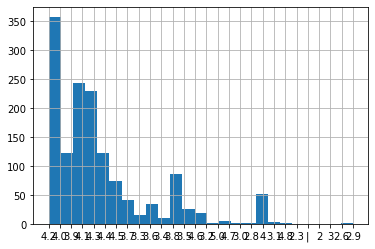

In [33]:
data.rating.hist(bins=25)
plt.show()

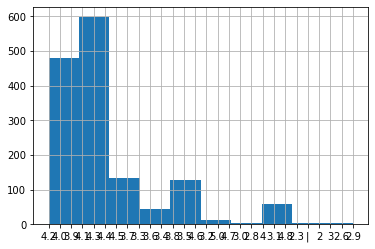

In [34]:
data.rating.hist()
plt.show()

<h1>Understanding Dataset Sparsity</h1>

In the context of recommendation systems, dataset sparsity refers to the proportion of missing or unobserved ratings in the user-item interaction matrix. This concept is crucial because it reflects the extent to which users have interacted with a subset of items within the system. A sparser dataset implies that many potential user-item interactions are missing, making it challenging to predict users' preferences accurately.

In the provided code snippet, the sparsity of the dataset is calculated using the formula:
<blockquote>**Sparsity = (Number of Ratings) / (Number of Users * Number of Items)**</blockquote>


The calculated sparsity value is then multiplied by 100 to express it as a percentage. A lower sparsity percentage indicates a denser dataset with more interactions, which can lead to better recommendation accuracy. Conversely, a higher sparsity percentage suggests that a large portion of user-item pairs is unobserved, requiring sophisticated recommendation algorithms to make accurate predictions and suggestions.


In [37]:
num_ratings = float(len(data))
num_products = float(len(np.unique(data["item_encoded"])))
num_users = float(len(np.unique(data["user_encoded"])))
sparsity = (num_ratings / (num_products * num_users)) * 100.0
print("Sparsity of Dataset is", sparsity, "Percent")

Sparsity of Dataset is 0.0908192578981758 Percent


In [49]:
data = data[data['rating'] != '|']

<h1>Cross-Validation</h1>

Cross-validation is a fundamental technique we heavily employ in our code for both training and evaluating our recommendation models. This approach expands upon the concept of a single train-test split that you're likely familiar with.

However, we're taking a more comprehensive approach by conducting multiple data splits. Each of these splits is referred to as a **"fold"**. In our case, the parameter "k" denotes the number of folds we utilize, and a common choice is k=5.

In simpler terms, instead of relying on just one division of the data, we're diversifying our training and evaluation by considering several different divisions. This helps ensure that our models' performance metrics are not overly dependent on a single data partition, contributing to a more reliable assessment of their real-world applicability.

This image provides a visual explanation of how cross validation works.

<img src = "https://www.researchgate.net/profile/Mingchao-Li/publication/331209203/figure/fig2/AS:728070977748994@1550597056956/K-fold-cross-validation-method.png" width="450">

We will use **"cross_validate"** from surprise package to run the models as listed and check their respective RMSEs

<h3>Coverting data in to surprise dataset</h3>
<blockquote>The Surprise package facilitates the conversion of the existing DataFrame into a format suitable for recommendation modeling.</blockquote>
<blockquote>The Reader class is employed to define the scaling and formatting of ratings within the dataset.</blockquote>
<blockquote>The Dataset.load_from_df method loads the DataFrame into a Surprise Dataset object.</blockquote>

In [52]:
#coverting data in to surprise dataset
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(data[['user_encoded', 'item_encoded', 'rating']], reader)

<h1>Model 1: Random</h1>

<h3>Baseline Random Prediction:</h3>

<li>NormalPredictor is a non-personalized algorithm used to establish a baseline performance for recommendation systems.</li>
<li>It does not consider user preferences, past interactions, or item characteristics; instead, it relies solely on randomness.</li>

<h3>Distribution-Based Prediction:</h3>

<li>The algorithm assumes that the distribution of ratings in the training set resembles a normal distribution.</li>
<li>It generates random ratings for user-item pairs based on this assumed normal distribution.</li>

The evaluation of the `NormalPredictor` baseline model using cross-validation yielded an average **RMSE (Root Mean Squared Error)** value of approximately 0.42 for the test set. This indicates that the random predictions generated by the `NormalPredictor` algorithm deviate from the actual ratings by an average of 0.42 units. While this result provides a baseline benchmark, it highlights the importance of employing more advanced recommendation algorithms that can significantly outperform the simple random-based predictions in delivering accurate and personalized product recommendations.

In [53]:
#Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.
model_random = NormalPredictor()
print('Average RMSE for Test Set using {} is '.format(model_random.__class__.__name__),model_using_normal_predictor['test_rmse'].mean())

In [54]:
model_using_normal_predictor = cross_validate(model_random, data,measures=['RMSE'],cv=5, verbose=False)

In [55]:
print('Average RMSE for Test Set using {} is '.format(model_random.__class__.__name__),model_using_normal_predictor['test_rmse'].mean())

Average RMSE for Test Set using NormalPredictor is  0.420520642073955


<h1>Model 2: User-Based Collaborative Filtering:</h1>

- Technique based on user-user similarity to make recommendations.
- Predicts items a user might like by analyzing ratings from similar users.
- In our implementation, we have implemented User-Based Collaborative Filtering using the KNNBasic algorithm with cosine similarity. This involves calculating the similarity between users based on their interactions with products. Users who have shown similar patterns of behavior are considered "neighbors."

This image provides a visual explanation of how user-based collaborative filtering works.

<img src="cf_un.png" width=300>


<h3>KNNBasic Algorithm:</h3>

- Part of Surprise package, stands for k-Nearest Neighbors Basic.
- Identifies k nearest neighbors to the target user based on similarity.
- Predicts ratings using neighbors' ratings.

<h3>sim_options Parameter:</h3>

- name='cosine': Uses cosine similarity to measure user similarity.
- user_base=True: Focuses on finding similar users for predictions.
- verbose=False: Suppresses verbose output during model evaluation.

<h3>Cross-Validation and Evaluation:</h3>

- cross_validate function evaluates model_user_based.
- Uses RMSE as the evaluation metric.
- Performs 5-fold cross-validation (cv=5).


In [56]:
model_user_based = KNNBasic(sim_options ={'name':'cosine','user_base':True},verbose=False)
model_using_KNNbasic_cos_user = cross_validate(model_user_based,data,measures=['RMSE'],cv=5, verbose=False)

In [57]:
print('Average RMSE for Test Set using {} is '.format(model_user_based.__class__.__name__),model_using_KNNbasic_cos_user['test_rmse'].mean())

Average RMSE for Test Set using KNNBasic is  0.28154917475814367


<h1>Model 3: Item-Based Collaborative Filtering:</h1>

- Item-Based Collaborative Filtering is a technique used to recommend items to users by identifying items that are similar to the ones they have interacted with or rated positively. 
- This approach assumes that users who liked a particular item are likely to also enjoy similar items. 
- In contrast to User-Based Collaborative Filtering that focuses on finding similar users, Item-Based Collaborative Filtering focuses on finding similar items.
- Similar to user-based collaborative filtering, we've implemented the KNNBasic algorithm for item-based collaborative filtering by configuring it with cosine similarity and evaluating its performance using RMSE through cross-validation.

This image provides a visual explanation of how item-based collaborative filtering works.

<img src="cf_ib.png" width=300>

In [58]:
model_item_based = KNNBasic(sim_options ={'name':'cosine','user_base':False},verbose=False)
model_using_KNNbasic_cos_item = cross_validate(model_item_based,data,measures=['RMSEprint('Average RMSE for Test Set using {} is '.format(model_item_based.__class__.__name__),model_using_KNNbasic_cos_item['test_rmse'].mean())'],cv=5, verbose=False)

In [59]:
print('Average RMSE for Test Set using {} is '.format(model_item_based.__class__.__name__),model_using_KNNbasic_cos_item['test_rmse'].mean())

Average RMSE for Test Set using KNNBasic is  0.2808486682356751


<h1>Matrix Factorization and SVD:</h1>

- Matrix Factorization is a technique used to identify underlying patterns in a user-item rating matrix.
- Singular Value Decomposition (SVD) is a popular matrix factorization technique applied in recommendation systems.

<h3>Approach and Goal:</h3>

- The goal is to predict user ratings by identifying latent features that explain the relationships between users and items.
- The technique uncovers hidden patterns and preferences in the user-item interaction matrix.

<h3>Implementation Steps:</h3>

- Model Initialization: Initializing an instance of the SVD algorithm for matrix factorization.
- Cross-Validation and Evaluation: You use the cross_validate function to evaluate the performance of model_svd using 5-fold cross-validation.
  - The evaluation metric is set to RMSE (measures=['RMSE']).
  - The verbose=False parameter suppresses verbose output during model evaluation.

<h3>Print Result:</h3> 

- The average RMSE value calculated from the cross-validation process using the model_svd algorithm.

<h1>Singular Value Decomposition</h1>

- The Singular Value Decomposition (SVD), a method from linear algebra that has been generally used as a dimensionality reduction technique in machine learning. 
- SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N). 
- It uses a matrix structure where each row represents a user, and each column represents an item. 
- The elements of this matrix are the ratings that are given to items by users.

This image provides a visual explanation of how SVD works.

<img src="https://www.i2tutorials.com/wp-content/media/2019/10/Singular-Value-Decomposition-i2tutorials.png" width=700>

In [60]:
#matrix factorisation using svd
model_svd = SVD()
model_using_svd = cross_validate(model_svd,data,measures=['RMSE'],cv=5, verbose=False)

In [61]:
print('Average RMSE for Test Set using {} is '.format(model_svd.__class__.__name__),model_using_svd['test_rmse'].mean())

Average RMSE for Test Set using SVD is  0.2833335882361503


<h1>Precision and Recall</h1>

<h3>Precision</h3>

- Precision is the ratio of correctly predicted relevant items to the total number of items predicted as relevant. 
- In the context of recommendations, it measures how accurate the system is in suggesting items that the user would actually like.
- It is defined as follows:
<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/prec.png'>

<h3>Recall</h3>

- Recall is the ratio of correctly predicted relevant items to the total number of actually relevant items. 
- It measures the system's ability to retrieve all relevant items for the user.
- It is defined as follows:
<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/recall.png'>

In [62]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

In [63]:
#A basic cross-validation iterator.
kf = KFold(n_splits=5)

In [64]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user_based, model_item_based, model_svd]

for k in K:
    for model in models:
        print('> k={}, model={}'.format(k,model.__class__.__name__))
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('-----> Precision: ', round(sum(p) / len(p), 3))
        print('-----> Recall: ', round(sum(r) / len(r), 3))

> k=5, model=NormalPredictor
-----> Precision:  0.949
-----> Recall:  0.948
> k=5, model=KNNBasic
-----> Precision:  0.97
-----> Recall:  0.97
> k=5, model=KNNBasic
-----> Precision:  0.97
-----> Recall:  0.97
> k=5, model=SVD
-----> Precision:  0.97
-----> Recall:  0.97
> k=10, model=NormalPredictor
-----> Precision:  0.942
-----> Recall:  0.941
> k=10, model=KNNBasic
-----> Precision:  0.97
-----> Recall:  0.97
> k=10, model=KNNBasic
-----> Precision:  0.971
-----> Recall:  0.971
> k=10, model=SVD
-----> Precision:  0.97
-----> Recall:  0.97


In [65]:
#function can be found on surprise documentation FAQs
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [66]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

In [67]:
models = [model_random, model_user_based, model_item_based, model_svd]
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model.__class__.__name__}, {user}: {np.round(top_n[user],2)}')

model: NormalPredictor, 623: [[ 903.      4.94]
 [1032.      4.93]
 [1213.      4.92]
 [ 658.      4.9 ]
 [ 377.      4.89]]
model: KNNBasic, 623: [[848.    4.1]
 [819.    4.1]
 [643.    4.1]
 [588.    4.1]
 [771.    4.1]]
model: KNNBasic, 623: [[848.    4.1]
 [819.    4.1]
 [643.    4.1]
 [588.    4.1]
 [771.    4.1]]
model: SVD, 623: [[111.     4.45]
 [240.     4.45]
 [890.     4.45]
 [  6.     4.44]
 [193.     4.44]]


<h1>Result</h1>

The outcome highlights the differences in recommendations provided by various models. While the NormalPredictor and KNNBasic models seem to offer less personalized and uniform recommendations, the SVD model demonstrates a better attempt at capturing user preferences. This outcome underscores the importance of model selection and evaluation for generating meaningful and relevant recommendations in a personalized product ranking system.

As expected, we have got the predictions (n=5) for each model. We printed the predictions for One user for each model. Collaborative models (User-based & Item-based) have given exactly same recommendations.

The rating values for Random is fixed at 4.9, User-based,and Item-based is fixed at 4.1. The rating values for Matrix Factorization using SVD have a mean of 4.45.